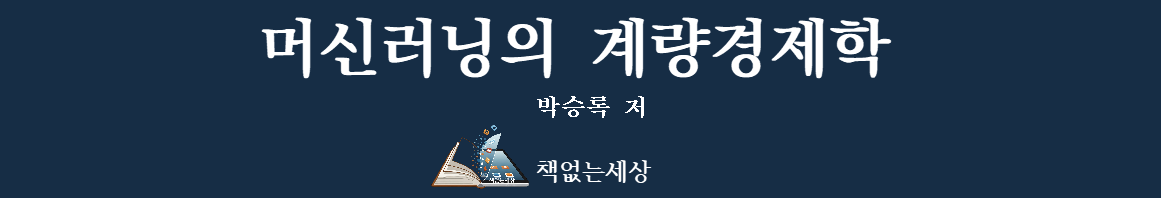

# Part 4: 계량경제학적 평가주제

## Chapter 2. 이분산(Homoscedasticity)

In [2]:
# 작업공간(working directory)지정  
import os  
os.chdir("E:/JupyterWDirectory/MyStock")
os.getcwd()

'E:\\JupyterWDirectory\\MyStock'

In [3]:
exec(open('Functions/Traditional_Econometrics_Lib.py').read())

In [ ]:
"""
# #####################################################################
# 위의 함수는 아래 다양한 라이브러리와 함수를 한 문장으로 불러오는 방법
# #####################################################################

# 분석에 사용될 라이브러리(Libraries for the Analysis) 불러오기
# Libraries for the Analysis of Traditional Econometrics.py
# 불러오는 방법:  "exec(open('Functions/Traditional_Econometrics_Lib.py').read())"
# #####################################################################

# 만약 특정 라이브러리가 설치되지 않았다는 에러 메시지가 나타날 때는 
# 해당 라이브러리를 설치하여야 함
# 아래 라이브러리를 하나 하나 실행하면서 어떤 라이브러리가 설치되지 않았는지 확인하여도 됨
# #####################################################################
import os
import numpy as np                                       # Numerical calculations
import pandas as pd                                      # Data handling
import math as someAlias
import matplotlib.dates as mdates                        # Turn dates into numbers
import matplotlib.pyplot as plt                          # Lower-level graphics
import patsy as pt
import seaborn as sns
import stargazer.stargazer as sg
import statsmodels.api as sm
import statsmodels.formula.api as smf                    # Econometrics
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as dg
import statsmodels.stats.outliers_influence as smo
import linearmodels as lm                                # Panel model, Simultaneous Eq. Model
import scipy.stats as stats                              # Statistics
import random

from scipy.optimize import Bounds
from scipy.optimize import curve_fit                    # Nonlinear regression
from scipy.optimize import minimize
from scipy.stats import norm
from statsmodels.graphics import tsaplots               # Time series
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.api import VAR
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller          # ADF test
from statsmodels.tsa.stattools import coint             # Cointegration
from statsmodels.tsa.vector_ar.vecm import VECM
from arch import arch_model

import wooldridge as woo
from imfpy.retrievals import dots
import wbdata
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")
"""

In [4]:
import wooldridge as woo
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# 데이터 읽어들이기. 필요한 변수, 관측치 선택
gpa3 = woo.dataWoo('gpa3')
gpa3 = gpa3[gpa3['spring'] == 1]
df = gpa3[['cumgpa', 'sat', 'hsperc', 'tothrs', 'female', 'black', 'white']]

# 단순기술통계량, 상관계수
print(df.describe())
print(df.corr())

           cumgpa          sat      hsperc      tothrs      female  \
count  366.000000   366.000000  366.000000  366.000000  366.000000   
mean     2.334153   898.907104   34.996774   54.030055    0.245902   
std      0.601126   168.306332   22.229738   34.377146    0.431210   
min      0.000000   450.000000    0.222222   10.000000    0.000000   
25%      1.970000   790.000000   15.862268   16.250000    0.000000   
50%      2.250000   900.000000   31.163724   47.000000    0.000000   
75%      2.710000  1017.500000   51.418539   79.000000    0.000000   
max      4.000000  1430.000000  100.000000  134.000000    1.000000   

            black       white  
count  366.000000  366.000000  
mean     0.210383    0.756831  
std      0.408138    0.429584  
min      0.000000    0.000000  
25%      0.000000    1.000000  
50%      0.000000    1.000000  
75%      0.000000    1.000000  
max      1.000000    1.000000  
          cumgpa       sat    hsperc    tothrs    female     black     white
cumg

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4701      0.230      6.397      0.000       1.018       1.922
sat            0.0011      0.000      6.389      0.000       0.001       0.001
hsperc        -0.0086      0.001     -6.906      0.000      -0.011      -0.006
tothrs         0.0025      0.001      3.426      0.001       0.001       0.004
female         0.3034      0.059      5.141      0.000       0.187       0.420
black         -0.1283      0.147     -0.870      0.385      -0.418       0.162
white         -0.0587      0.141     -0.416      0.677      -0.336       0.219


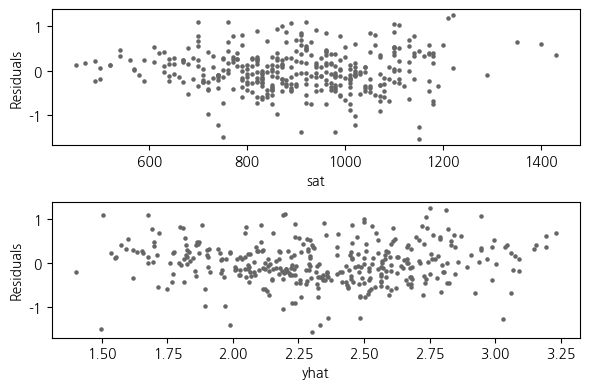

In [5]:
# 기본 회귀분석
reg = smf.ols(formula='cumgpa ~ sat + hsperc + tothrs + female + black + white', data=df)
results_default = reg.fit()
print(results_default.summary().tables[1])

# 잔차의 그래프
res = results_default.resid
yhat = results_default.fittedvalues

fig, ax = plt.subplots(2, 1, figsize=(6,4))
ax[0].set_xlabel('sat');
ax[0].set_ylabel('Residuals');
ax[0].scatter(df.sat, res, color='0.4', s=5)
ax[1].set_xlabel('yhat');
ax[1].set_ylabel('Residuals');
ax[1].scatter(yhat, res, color='0.4', s=5);
fig.subplots_adjust(hspace = 0.4);
fig.tight_layout();

In [6]:
# 화이트(White)의 기본 강건 표준오차 추정
results_white = reg.fit(cov_type='HC0')
print(results_white.summary().tables[1])

# 화이트(White)의 수정된 표준오차(refined White SE) 추정
results_refined = reg.fit(cov_type='HC3')
print(results_refined.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4701      0.219      6.726      0.000       1.042       1.898
sat            0.0011      0.000      6.014      0.000       0.001       0.002
hsperc        -0.0086      0.001     -6.100      0.000      -0.011      -0.006
tothrs         0.0025      0.001      3.414      0.001       0.001       0.004
female         0.3034      0.059      5.181      0.000       0.189       0.418
black         -0.1283      0.118     -1.086      0.277      -0.360       0.103
white         -0.0587      0.110     -0.532      0.595      -0.275       0.158
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4701      0.229      6.409      0.000       1.020       1.920
sat            0.0011      0.000      5.840      0.0

In [7]:
# 추정모형과 검증가설(hypotheses) : 흑인/백인의 차이 없음을 검증(두 변수의 상관계수 -0.91)
reg = smf.ols(formula='cumgpa ~ sat + hsperc + tothrs + female + black + white',
              data=df)
hypotheses = ['black = 0', 'white = 0']

# 사용한 variance-covariance formulas에 따른 F-Tests의 차이
# 통상적인 VCOV:
results_default = reg.fit()
ftest_default = results_default.f_test(hypotheses)
fstat_default = ftest_default.statistic
fpval_default = ftest_default.pvalue
print(f'fstat_default: {fstat_default}\n')
print(f'fpval_default: {fpval_default}\n')

# 화이트(White)의 VCOV
results_hc0 = reg.fit(cov_type='HC0')
ftest_hc0 = results_hc0.f_test(hypotheses)
fstat_hc0 = ftest_hc0.statistic
fpval_hc0 = ftest_hc0.pvalue
print(f'fstat_HC0: {fstat_hc0}\n')
print(f'fpval_HC0: {fpval_hc0}\n')

# 수정된  White의 VCOV(refined White VCOV)
results_hc3 = reg.fit(cov_type='HC3')
ftest_hc3 = results_hc3.f_test(hypotheses)
fstat_hc3 = ftest_hc3.statistic
fpval_hc3 = ftest_hc3.pvalue
print(f'fstat_HC3: {fstat_hc3}\n')
print(f'fpval_HC3: {fpval_hc3}\n')


fstat_default: 0.6796041956073446

fpval_default: 0.5074683622584049

fstat_HC0: 0.747796981803628

fpval_HC0: 0.4741442714738484

fstat_HC3: 0.6724692957656682

fpval_HC3: 0.5110883633440992



In [8]:
# 분산함수 추정(estimation of the variance function):
df['log_e2'] = np.log(res**2)
reg_fgls = smf.ols(formula='log_e2 ~ sat + hsperc + tothrs + female + black + white',
                   data=df)
results_fgls = reg_fgls.fit()
display(results_fgls.summary())

# 가중최소자승법(WLS)
wls_weight = (1 / np.exp(results_fgls.fittedvalues))
reg_wls = smf.wls(formula='cumgpa ~ sat + hsperc + tothrs + female + black + white',
                  weights=wls_weight, data=df)
results_wls = reg_wls.fit()
display(results_wls.summary())
print(results_wls.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_e2   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     4.313
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           0.000324
Time:                        20:50:24   Log-Likelihood:                -793.51
No. Observations:                 366   AIC:                             1601.
Df Residuals:                     359   BIC:                             1628.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.0355      1.046     -2.903      0.004      -5.092      -0.979
sat            0.0016      0.001      1.985      0.048    1.53e-05       0.003
hsperc        -0.0054      0.006     -0.952      0.342      -0.016       0.006
tothrs        -0.0133      0.003     -4.008      0.000      -0.020      -0.007
female        -0.3035      0.269     -1.130      0.259      -0.832       0.225
black         -0.1043      0.671     -0.156      0.876      -1.423       1.215
white         -0.3371      0.642     -0.525      0.600      -1.599       0.925
==============================================================================
Omnibus:                      146.632   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              583.207
Skew:                          -1.745   Prob(JB):                    2.28e-127
Kurtosis:                       8.105   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 cumgpa   R-squared:                       0.437
Model:                            WLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     46.35
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           6.08e-42
Time:                        20:50:24   Log-Likelihood:                -211.09
No. Observations:                 366   AIC:                             436.2
Df Residuals:                     359   BIC:                             463.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3907      0.205      6.783      0.000       0.987       1.794
sat            0.0011      0.000      6.750      0.000       0.001       0.001
hsperc        -0.0064      0.001     -5.835      0.000      -0.008      -0.004
tothrs         0.0026      0.001      4.217      0.000       0.001       0.004
female         0.2904      0.049      5.974      0.000       0.195       0.386
black         -0.0661      0.137     -0.481      0.631      -0.336       0.204
white          0.0267      0.133      0.200      0.841      -0.236       0.289
==============================================================================
Omnibus:                        1.765   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                1.627
Skew:                          -0.036   Prob(JB):                        0.443
Kurtosis:                       3.318   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

                            WLS Regression Results                            
Dep. Variable:                 cumgpa   R-squared:                       0.437
Model:                            WLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     46.35
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           6.08e-42
Time:                        20:50:24   Log-Likelihood:                -211.09
No. Observations:                 366   AIC:                             436.2
Df Residuals:                     359   BIC:                             463.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3907      0.205      6.783      0.0

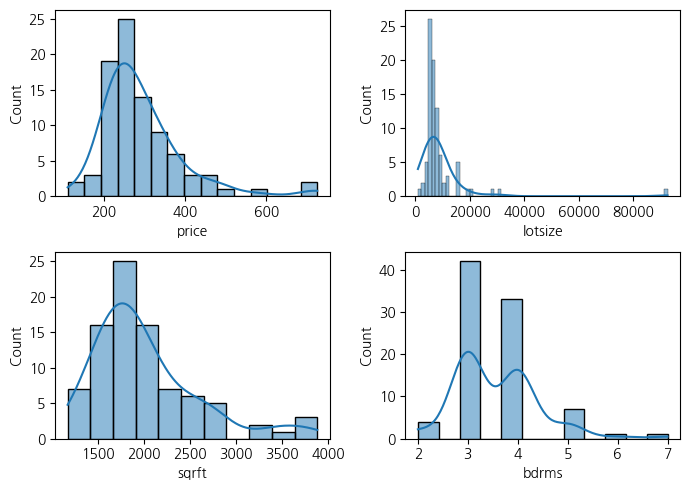

In [9]:
# 이분산 존재 검증을 위한 Breusch Pagan test와 White test
import wooldridge as woo
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import patsy as pt

df = woo.dataWoo('hprice1')

fig, axs = plt.subplots(2, 2, figsize=(7, 5))
sns.histplot(data=df, x="price", kde=True, ax=axs[0, 0])
sns.histplot(data=df, x="lotsize", kde=True, ax=axs[0, 1])
sns.histplot(data=df, x="sqrft", kde=True, ax=axs[1, 0])
sns.histplot(data=df, x="bdrms", kde=True, ax=axs[1, 1])
plt.tight_layout()
plt.show()

In [10]:
# 기본모형 추정
reg = smf.ols(formula='price ~ lotsize + sqrft + bdrms', data=df)
results = reg.fit()
display(results.summary())

# F통계를 이용한 BP test(F version):
df['resid_sq'] = results.resid ** 2
reg_resid = smf.ols(formula='resid_sq ~ lotsize + sqrft + bdrms', data=df)
results_resid = reg_resid.fit()
bp_F_statistic = results_resid.fvalue
bp_F_pval = results_resid.f_pvalue
print(f'bp_F_statistic: {bp_F_statistic}\n')
print(f'bp_F_pval: {bp_F_pval}\n')

# LM통계를 이용한 BP test
y, X = pt.dmatrices('price ~ lotsize + sqrft + bdrms',
                    data=df, return_type='dataframe')
result_bp_lm = sm.stats.diagnostic.het_breuschpagan(results.resid, X)
bp_lm_statistic = result_bp_lm[0]
bp_lm_pval = result_bp_lm[1]
print(f'bp_lm_statistic: {bp_lm_statistic}\n')
print(f'bp_lm_pval: {bp_lm_pval}\n')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     57.46
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           2.70e-20
Time:                        20:50:38   Log-Likelihood:                -482.88
No. Observations:                  88   AIC:                             973.8
Df Residuals:                      84   BIC:                             983.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.7703     29.475     -0.739      0.462     -80.385      36.844
lotsize        0.0021      0.001      3.220      0.002       0.001       0.003
sqrft          0.1228      0.013      9.275      0.000       0.096       0.149
bdrms         13.8525      9.010      1.537      0.128      -4.065      31.770
==============================================================================
Omnibus:                       20.398   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.278
Skew:                           0.961   Prob(JB):                     9.79e-08
Kurtosis:                       5.261   Cond. No.                     6.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

bp_F_statistic: 5.338919363241419

bp_F_pval: 0.0020477444209360744

bp_lm_statistic: 14.092385504350242

bp_lm_pval: 0.0027820595556890867



In [11]:
# 이분산 존재 검증을 위한 Breusch Pagan test와 White test: log모형에 적용
import wooldridge as woo
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy as pt

hprice1 = woo.dataWoo('hprice1')

# 로그 변환 모형의 정의
reg = smf.ols(formula='np.log(price) ~ np.log(lotsize) + np.log(sqrft) + bdrms',
              data=hprice1)
results = reg.fit()
display(results.summary())

# BP test:
y, X_bp = pt.dmatrices('np.log(price) ~ np.log(lotsize) + np.log(sqrft) + bdrms',
                       data=hprice1, return_type='dataframe')
result_bp = sm.stats.diagnostic.het_breuschpagan(results.resid, X_bp)
bp_statistic = result_bp[0]
bp_pval = result_bp[1]
print(f'bp_statistic: {bp_statistic}\n')
print(f'bp_pval: {bp_pval}\n')

# White test:
X_wh = pd.DataFrame({'const': 1, 'fitted_reg': results.fittedvalues,
                     'fitted_reg_sq': results.fittedvalues ** 2})
result_white = sm.stats.diagnostic.het_breuschpagan(results.resid, X_wh)
white_statistic = result_white[0]
white_pval = result_white[1]
print(f'white_statistic: {white_statistic}\n')
print(f'white_pval: {white_pval}\n')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     50.42
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           9.74e-19
Time:                        20:50:45   Log-Likelihood:                 25.861
No. Observations:                  88   AIC:                            -43.72
Df Residuals:                      84   BIC:                            -33.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.2970      0.651     -1.992      0.050      -2.592      -0.002
np.log(lotsize)     0.1680      0.038      4.388      0.000       0.092       0.244
np.log(sqrft)       0.7002      0.093      7.540      0.000       0.516       0.885
bdrms               0.0370      0.028      1.342      0.183      -0.018       0.092
==============================================================================
Omnibus:                       12.060   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               34.889
Skew:                          -0.188   Prob(JB):                     2.65e-08
Kurtosis:                       6.062   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

bp_statistic: 4.223245741805276

bp_pval: 0.2383448263149296

white_statistic: 3.4472865468750156

white_pval: 0.17841494794133259



In [12]:
import wooldridge as woo
import pandas as pd
import statsmodels.formula.api as smf

k401ksubs = woo.dataWoo('401ksubs')
display(k401ksubs)
k401ksubs.describe()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170000,0,0,40,1,4.575000,0,1,173.448898,1600
1,1,61.230000,0,1,35,1,154.000000,1,0,3749.112793,1225
2,0,12.858000,1,0,44,2,0.000000,0,0,165.328156,1936
3,0,98.879997,1,1,44,2,21.799999,0,0,9777.253906,1936
4,0,22.614000,0,0,53,1,18.450001,0,0,511.393005,2809
...,...,...,...,...,...,...,...,...,...,...,...
9270,0,58.428001,1,0,33,4,-1.200000,0,0,3413.831299,1089
9271,0,24.546000,0,1,37,3,2.000000,0,0,602.506104,1369
9272,0,38.549999,1,0,33,3,-13.600000,0,1,1486.102417,1089
9273,0,34.410000,1,0,57,3,3.550000,0,0,1184.048096,3249


,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
count,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000
mean,0.392129,39.254641,0.628571,0.204420,41.080216,2.885067,19.071675,0.276226,0.254340,2121.192476,1793.652722
std,0.488252,24.090002,0.483213,0.403299,10.299517,1.525835,63.963838,0.447154,0.435513,3001.469423,895.648841
min,0.000000,10.008000,0.000000,0.000000,25.000000,1.000000,-502.302002,0.000000,0.000000,100.160072,625.000000
25%,0.000000,21.660000,0.000000,0.000000,33.000000,2.000000,-0.500000,0.000000,0.000000,469.155579,1089.000000
50%,0.000000,33.287998,1.000000,0.000000,40.000000,3.000000,2.000000,0.000000,0.000000,1108.090820,1600.000000
75%,1.000000,50.160000,1.000000,0.000000,48.000000,4.000000,18.449500,1.000000,1.000000,2516.025635,2304.000000
max,1.000000,199.041000,1.000000,1.000000,64.000000,13.000000,1536.797974,1.000000,1.000000,39617.320312,4096.000000


In [13]:
# 데이터 세트 정의: fsize=1만 선택
k401ksubs_sub = k401ksubs[k401ksubs['fsize'] == 1]

# 회귀모형
reg_ols = smf.ols(formula='nettfa ~ inc + I((age-25)**2) + male + e401k',
                  data=k401ksubs_sub)
results_ols = reg_ols.fit(cov_type='HC2')
# print(results_ols.summary())
display(results_ols.summary())

# 가중 최소자승법(Weighted Least Squares: WLS)
wls_weight = list(1 / k401ksubs_sub['inc'])

reg_wls = smf.wls(formula='nettfa ~ inc + I((age-25)**2) + male + e401k',
                  weights=wls_weight, data=k401ksubs_sub)
results_wls = reg_wls.fit()

#print(results_wls.summary())
display(results_wls.summary())

# 가중 최소자승법(화이트의 수정된SE 사용, Refined White SE)
results_white = reg_wls.fit(cov_type='HC3')
#print(results_white.summary())
display(results_white.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 nettfa   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     28.83
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           2.47e-23
Time:                        20:50:59   Log-Likelihood:                -10514.
No. Observations:                2017   AIC:                         2.104e+04
Df Residuals:                    2012   BIC:                         2.107e+04
Df Model:                           4                                         
Covariance Type:                  HC2                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -20.9850      3.505     -5.986      0.000     -27.856     -14.114
inc                    0.7706      0.100      7.712      0.000       0.575       0.966
I((age - 25) ** 2)     0.0251      0.004      5.774      0.000       0.017       0.034
male                   2.4779      2.060      1.203      0.229      -1.561       6.516
e401k                  6.8862      2.288      3.010      0.003       2.402      11.371
==============================================================================
Omnibus:                     3739.993   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6814965.033
Skew:                          13.368   Prob(JB):                         0.00
Kurtosis:                     286.506   Cond. No.                     1.43e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 nettfa   R-squared:                       0.112
Model:                            WLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     63.13
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           2.51e-50
Time:                        20:50:59   Log-Likelihood:                -10083.
No. Observations:                2017   AIC:                         2.018e+04
Df Residuals:                    2012   BIC:                         2.020e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -16.7025      1.958     -8.530      0.000     -20.542     -12.863
inc                    0.7404      0.064     11.514      0.000       0.614       0.866
I((age - 25) ** 2)     0.0175      0.002      9.080      0.000       0.014       0.021
male                   1.8405      1.564      1.177      0.239      -1.226       4.907
e401k                  5.1883      1.703      3.046      0.002       1.848       8.529
==============================================================================
Omnibus:                     3669.299   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6357164.217
Skew:                          12.819   Prob(JB):                         0.00
Kurtosis:                     276.835   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 nettfa   R-squared:                       0.112
Model:                            WLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     39.46
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           7.50e-32
Time:                        20:50:59   Log-Likelihood:                -10083.
No. Observations:                2017   AIC:                         2.018e+04
Df Residuals:                    2012   BIC:                         2.020e+04
Df Model:                           4                                         
Covariance Type:                  HC3                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -16.7025      2.248     -7.429      0.000     -21.109     -12.296
inc                    0.7404      0.075      9.840      0.000       0.593       0.888
I((age - 25) ** 2)     0.0175      0.003      6.765      0.000       0.012       0.023
male                   1.8405      1.313      1.402      0.161      -0.733       4.414
e401k                  5.1883      1.574      3.296      0.001       2.103       8.274
==============================================================================
Omnibus:                     3669.299   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6357164.217
Skew:                          12.819   Prob(JB):                         0.00
Kurtosis:                     276.835   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Feasible GLS(FGLS) 추정법
import wooldridge as woo
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy as pt

smoke = woo.dataWoo('smoke')
display(smoke )
smoke.describe()

# 회귀모형
formula='cigs ~ np.log(income) + np.log(cigpric) + educ + age + I(age**2) + restaurn'
reg_ols = smf.ols(formula, data=smoke)
results_ols = reg_ols.fit()
display(results_ols)

# BP test:
y, X = pt.dmatrices('cigs ~ np.log(income) + np.log(cigpric) + educ +'
                    'age + I(age**2) + restaurn',
                    data=smoke, return_type='dataframe')
result_bp = sm.stats.diagnostic.het_breuschpagan(results_ols.resid, X)
bp_statistic = result_bp[0]
bp_pval = result_bp[1]
print(f'bp_statistic: {bp_statistic}\n')
print(f'bp_pval: {bp_pval}\n')

,educ,cigpric,white,age,income,cigs,restaurn,lincome,agesq,lcigpric
0,16.0,60.506001,1,46,20000,0,0,9.903487,2116,4.102743
1,16.0,57.882999,1,40,30000,0,0,10.308952,1600,4.058424
2,12.0,57.664001,1,58,30000,3,0,10.308952,3364,4.054633
3,13.5,57.882999,1,30,20000,0,0,9.903487,900,4.058424
4,10.0,58.320000,1,17,20000,0,0,9.903487,289,4.065945
...,...,...,...,...,...,...,...,...,...,...
802,18.0,61.818001,0,52,30000,20,0,10.308952,2704,4.124195
803,18.0,61.675999,1,31,12500,0,0,9.433484,961,4.121895
804,16.0,60.707001,1,30,20000,0,0,9.903487,900,4.106059
805,10.0,59.987999,1,18,20000,0,0,9.903487,324,4.094144


bp_statistic: 32.25841908120112

bp_pval: 1.4557794830279539e-05



In [15]:
# FGLS (estimation of the variance function):
smoke['logu2'] = np.log(results_ols.resid ** 2)
reg_fgls = smf.ols(formula='logu2 ~ np.log(income) + np.log(cigpric) +'
                           'educ + age + I(age**2) + restaurn', data=smoke)
results_fgls = reg_fgls.fit()
display(results_fgls.summary())

# FGLS (WLS)
wls_weight = list(1 / np.exp(results_fgls.fittedvalues))
reg_wls = smf.wls(formula='cigs ~ np.log(income) + np.log(cigpric) +'
                          'educ + age + I(age**2) + restaurn',
                  weights=wls_weight, data=smoke)
results_wls = reg_wls.fit()
display(results_wls.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  logu2   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     43.82
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           2.16e-46
Time:                        20:51:13   Log-Likelihood:                -1428.4
No. Observations:                 807   AIC:                             2871.
Df Residuals:                     800   BIC:                             2904.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.9207      2.563     -0.749      0.454      -6.952       3.110
np.log(income)      0.2915      0.077      3.763      0.000       0.139       0.444
np.log(cigpric)     0.1954      0.615      0.318      0.751      -1.011       1.402
educ               -0.0797      0.018     -4.482      0.000      -0.115      -0.045
age                 0.2040      0.017     11.969      0.000       0.171       0.237
I(age ** 2)        -0.0024      0.000    -12.893      0.000      -0.003      -0.002
restaurn           -0.6270      0.118     -5.298      0.000      -0.859      -0.395
==============================================================================
Omnibus:                      403.747   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6091.252
Skew:                          -1.883   Prob(JB):                         0.00
Kurtosis:                      15.922   Cond. No.                     1.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                   cigs   R-squared:                       0.113
Model:                            WLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     17.06
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           1.32e-18
Time:                        20:51:13   Log-Likelihood:                -3207.8
No. Observations:                 807   AIC:                             6430.
Df Residuals:                     800   BIC:                             6462.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.6355     17.803      0.317      0.752     -29.311      40.582
np.log(income)      1.2952      0.437      2.964      0.003       0.437       2.153
np.log(cigpric)    -2.9403      4.460     -0.659      0.510     -11.695       5.815
educ               -0.4634      0.120     -3.857      0.000      -0.699      -0.228
age                 0.4819      0.097      4.978      0.000       0.292       0.672
I(age ** 2)        -0.0056      0.001     -5.990      0.000      -0.007      -0.004
restaurn           -3.4611      0.796     -4.351      0.000      -5.023      -1.900
==============================================================================
Omnibus:                      325.055   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1258.137
Skew:                           1.908   Prob(JB):                    6.30e-274
Kurtosis:                       7.780   Cond. No.                     2.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""